Load image

In [1]:
from PIL import Image
import os
import numpy as np

# Define the folder path
folder_path = os.path.join("Cleaned Breast Cancer Class", "benign")

# Initialize a list to store images
benign_images = []

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".png"):  # Check if the file is a PNG image
        file_path = os.path.join(folder_path, filename)
        try:
            # Load the image
            image = Image.open(file_path)
            # Optionally convert to a NumPy array
            image_array = np.array(image)
            # Append the image or its array to the list
            benign_images.append(image_array)
        except Exception as e:
            print(f"Error loading {filename}: {e}")

# Display the number of images loaded
print(f"Loaded {len(benign_images)} images from {folder_path}")


Loaded 437 images from Cleaned Breast Cancer Class\benign


In [2]:
# Define the folder path
folder_path = os.path.join("Cleaned Breast Cancer Class", "malignant")

# Initialize a list to store images
malignant_images = []

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".png"):  # Check if the file is a PNG image
        file_path = os.path.join(folder_path, filename)
        try:
            # Load the image
            image = Image.open(file_path)
            # Optionally convert to a NumPy array
            image_array = np.array(image)
            # Append the image or its array to the list
            malignant_images.append(image_array)
        except Exception as e:
            print(f"Error loading {filename}: {e}")

# Display the number of images loaded
print(f"Loaded {len(malignant_images)} images from {folder_path}")

Loaded 420 images from Cleaned Breast Cancer Class\malignant


In [3]:
# Define the folder path
folder_path = os.path.join("Cleaned Breast Cancer Class", "normal")

# Initialize a list to store images
normal_images = []

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".png"):  # Check if the file is a PNG image
        file_path = os.path.join(folder_path, filename)
        try:
            # Load the image
            image = Image.open(file_path)
            # Optionally convert to a NumPy array
            image_array = np.array(image)
            # Append the image or its array to the list
            normal_images.append(image_array)
        except Exception as e:
            print(f"Error loading {filename}: {e}")

# Display the number of images loaded
print(f"Loaded {len(normal_images)} images from {folder_path}")

Loaded 399 images from Cleaned Breast Cancer Class\normal


Split data into train test valid

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split

# Combine the lists and create labels (normal, benign, and cancer)
X = np.array(benign_images + malignant_images + normal_images)
y = np.array([0] * len(benign_images) + [1] * len(malignant_images) + [2] * len(normal_images))

# Split dataset into train, validation, and test sets (80%, 10%, 10%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42, stratify=y)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5, shuffle=True, random_state=42)

In [5]:
X_train.shape

(1004, 224, 224, 3)

1st Architecture

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Input shape (flattened version for DNN)
input_shape = (224 * 224 * 3,)  # Flattened size of an RGB image

# Build the DNN model
def build_dnn_model(input_shape):
    model = Sequential()
    
    # Input layer
    model.add(Dense(32, activation='relu', input_shape=input_shape))

    # Hidden layers
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    
    # Output layer for multiclass classification
    model.add(Dense(3, activation='softmax'))
    
    return model

# Build and compile the model
model = build_dnn_model(input_shape)
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Flatten input data for DNN
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_valid_flattened = X_valid.reshape(X_valid.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

# Create tf.data.Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_flattened, y_train)).batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = tf.data.Dataset.from_tensor_slices((X_valid_flattened, y_valid)).batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_flattened, y_test)).batch(32).prefetch(tf.data.AUTOTUNE)

# Train the model
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=valid_dataset,
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_dataset)
print(f'Test accuracy: {test_acc:.4f}')


c:\Users\Joe Chok\anaconda3\envs\dlmodels\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │     4,816,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,820,195 (18.39 MB)

 Trainable params: 4,820,195 (18.39 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.3124 - loss: 915.5906 - val_accuracy: 0.3413 - val_loss: 205.7595
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.4288 - loss: 164.5275 - val_accuracy: 0.4762 - val_loss: 48.9408
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.4519 - loss: 133.3911 - val_accuracy: 0.5159 - val_loss: 71.7353
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.5396 - loss: 85.5717 - val_accuracy: 0.4921 - val_loss: 60.9324
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.5110 - loss: 45.0079 - val_accuracy: 0.4286 - val_loss: 29.7980
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.4855 - loss: 48.6537 - val_accuracy: 0.3571 - val_loss: 96.9484
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.4526 - loss: 68.0290 - val_accuracy: 0.4524 - val_loss: 42.6726
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.5404 - loss: 30.1404 - val_a

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Test accuracy: 0.5635

Test Set Classification Report:
              precision    recall  f1-score   support

           0    0.46512   0.40816   0.43478        49
           1    0.62222   0.68293   0.65116        41
           2    0.60526   0.63889   0.62162        36

    accuracy                        0.56349       126
   macro avg    0.56420   0.57666   0.56919       126
weighted avg    0.55628   0.56349   0.55857       126



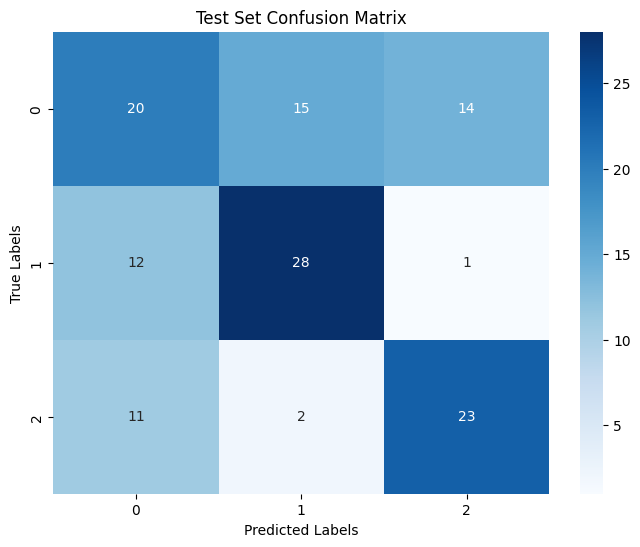

In [7]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Predict probabilities for the test set
test_predictions = model.predict(test_dataset)  # Output shape: (num_samples, num_classes)

# Get the predicted labels for the test set
test_predicted_labels = np.argmax(test_predictions, axis=1)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, test_predicted_labels)
print(f'Test accuracy: {test_accuracy:.4f}')

# Generate a classification report for the test set
print("\nTest Set Classification Report:")
print(classification_report(y_test, test_predicted_labels, digits=5))

# Generate a confusion matrix for the test set
cm_test = confusion_matrix(y_test, test_predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Test Set Confusion Matrix')
plt.show()


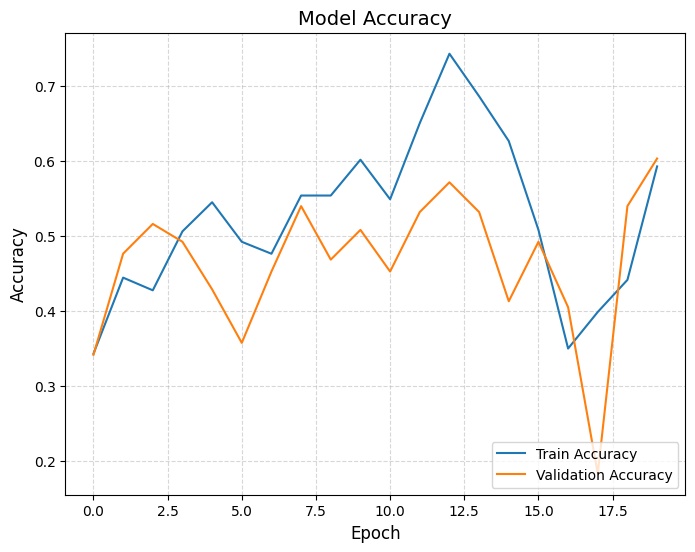

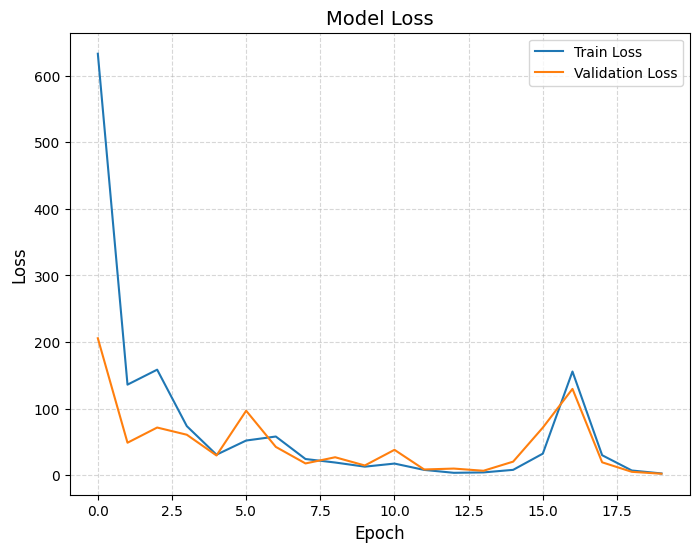

In [8]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(loc='lower right', fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss', fontsize=14)
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()


2nd Architecture

In [9]:
# Build the DNN model
def build_dnn_model(input_shape):
    model = Sequential()
    
    # Input layer
    model.add(Dense(32, activation='relu', input_shape=input_shape))
    
    # Hidden layers
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    
    # Output layer for multiclass classification
    model.add(Dense(3, activation='softmax'))
    
    return model

# Build and compile the model
model2 = build_dnn_model(input_shape)
model2.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.summary()

# Flatten input data for DNN
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_valid_flattened = X_valid.reshape(X_valid.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

# Create tf.data.Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_flattened, y_train)).batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = tf.data.Dataset.from_tensor_slices((X_valid_flattened, y_valid)).batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_flattened, y_test)).batch(32).prefetch(tf.data.AUTOTUNE)

# Train the model
history2 = model2.fit(
    train_dataset,
    epochs=20,
    validation_data=valid_dataset,
)

# Evaluate the model on the test set
test_loss, test_acc = model2.evaluate(test_dataset)
print(f'Test accuracy: {test_acc:.4f}')


c:\Users\Joe Chok\anaconda3\envs\dlmodels\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 32)             │     4,816,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,819,139 (18.38 MB)

 Trainable params: 4,819,139 (18.38 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.3708 - loss: 958.8144 - val_accuracy: 0.3810 - val_loss: 173.7428
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.4237 - loss: 210.6090 - val_accuracy: 0.4127 - val_loss: 231.0049
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.4530 - loss: 223.0831 - val_accuracy: 0.3889 - val_loss: 176.8980
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.5226 - loss: 126.4622 - val_accuracy: 0.3730 - val_loss: 228.1885
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.4826 - loss: 206.8057 - val_accuracy: 0.4286 - val_loss: 234.1928
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.5696 - loss: 100.6335 - val_accuracy: 0.5476 - val_loss: 77.4940
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.6172 - loss: 60.3531 - val_accuracy: 0.4444 - val_loss: 148.9247
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.5638 - loss: 90.9066

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Test accuracy: 0.4286

Test Set Classification Report:
              precision    recall  f1-score   support

           0    0.40000   0.57143   0.47059        49
           1    1.00000   0.02439   0.04762        41
           2    0.45455   0.69444   0.54945        36

    accuracy                        0.42857       126
   macro avg    0.61818   0.43009   0.35589       126
weighted avg    0.61082   0.42857   0.35549       126



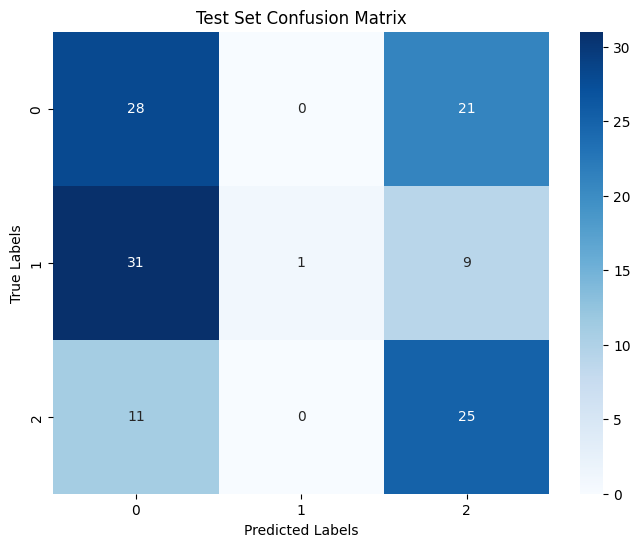

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Predict probabilities for the test set
test_predictions = model2.predict(test_dataset)  # Output shape: (num_samples, num_classes)

# Get the predicted labels for the test set
test_predicted_labels = np.argmax(test_predictions, axis=1)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, test_predicted_labels)
print(f'Test accuracy: {test_accuracy:.4f}')

# Generate a classification report for the test set
print("\nTest Set Classification Report:")
print(classification_report(y_test, test_predicted_labels, digits=5))

# Generate a confusion matrix for the test set
cm_test = confusion_matrix(y_test, test_predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Test Set Confusion Matrix')
plt.show()


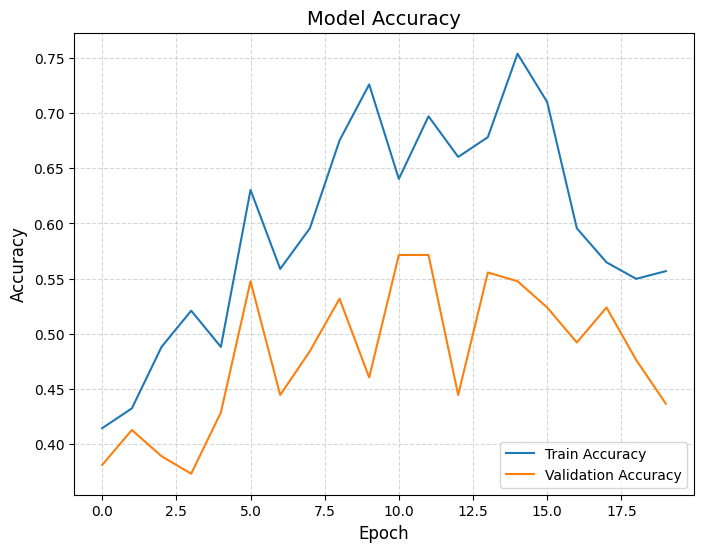

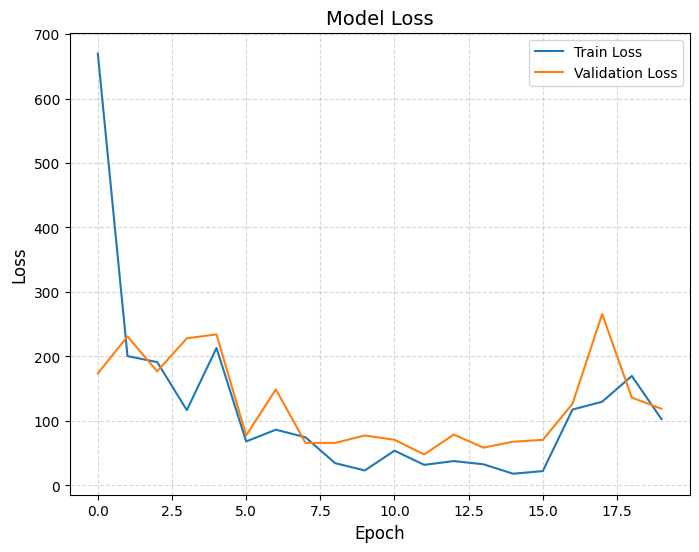

In [11]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(loc='lower right', fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss', fontsize=14)
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()


3rd Architecture

In [12]:
# Build the DNN model
def build_dnn_model(input_shape):
    model = Sequential()
    
    # Input layer
    model.add(Dense(32, activation='relu', input_shape=input_shape))
    
    # Hidden layers
    model.add(Dense(32, activation='relu'))
    
    # Output layer for multiclass classification
    model.add(Dense(3, activation='softmax'))
    
    return model

# Build and compile the model
model3 = build_dnn_model(input_shape)
model3.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model3.summary()

# Flatten input data for DNN
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_valid_flattened = X_valid.reshape(X_valid.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

# Create tf.data.Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_flattened, y_train)).batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = tf.data.Dataset.from_tensor_slices((X_valid_flattened, y_valid)).batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_flattened, y_test)).batch(32).prefetch(tf.data.AUTOTUNE)

# Train the model
history3 = model3.fit(
    train_dataset,
    epochs=20,
    validation_data=valid_dataset,
)

# Evaluate the model on the test set
test_loss, test_acc = model3.evaluate(test_dataset)
print(f'Test accuracy: {test_acc:.4f}')


c:\Users\Joe Chok\anaconda3\envs\dlmodels\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 32)             │     4,816,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,818,083 (18.38 MB)

 Trainable params: 4,818,083 (18.38 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.3764 - loss: 1855.0387 - val_accuracy: 0.5397 - val_loss: 215.0637
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.5106 - loss: 179.8826 - val_accuracy: 0.4841 - val_loss: 182.2606
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.4850 - loss: 267.5037 - val_accuracy: 0.4603 - val_loss: 135.8410
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.6112 - loss: 93.1741 - val_accuracy: 0.4524 - val_loss: 382.3935
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.5080 - loss: 274.9852 - val_accuracy: 0.4127 - val_loss: 356.5844
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.5207 - loss: 234.2016 - val_accuracy: 0.5714 - val_loss: 190.6113
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.5684 - loss: 183.5772 - val_accuracy: 0.5397 - val_loss: 183.4256
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.6771 - loss: 107.3

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x00000254C6F62700> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Test accuracy: 0.6746

Test Set Classification Report:
              precision    recall  f1-score   support

           0    0.82857   0.59184   0.69048        49
           1    0.61404   0.85366 

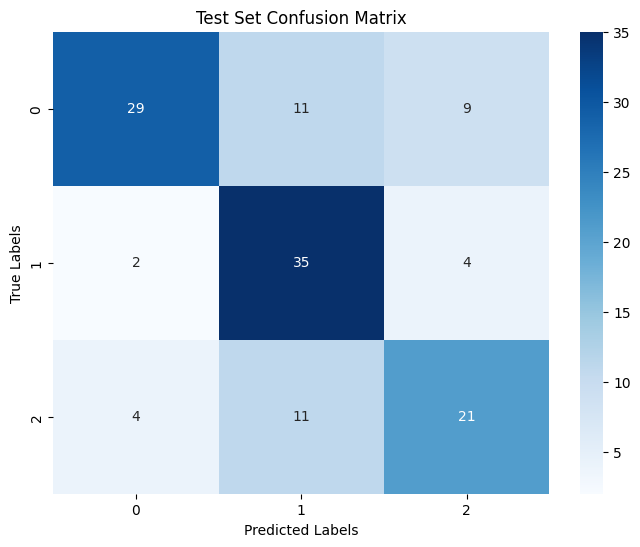

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Predict probabilities for the test set
test_predictions = model3.predict(test_dataset)  # Output shape: (num_samples, num_classes)

# Get the predicted labels for the test set
test_predicted_labels = np.argmax(test_predictions, axis=1)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, test_predicted_labels)
print(f'Test accuracy: {test_accuracy:.4f}')

# Generate a classification report for the test set
print("\nTest Set Classification Report:")
print(classification_report(y_test, test_predicted_labels, digits=5))

# Generate a confusion matrix for the test set
cm_test = confusion_matrix(y_test, test_predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Test Set Confusion Matrix')
plt.show()


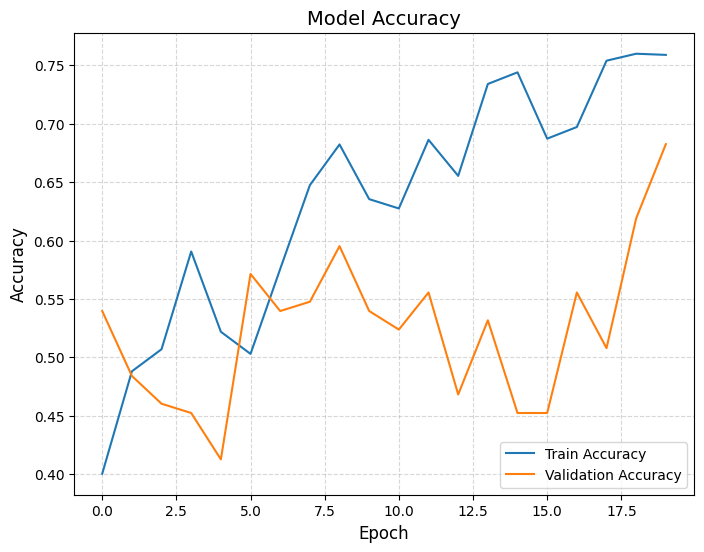

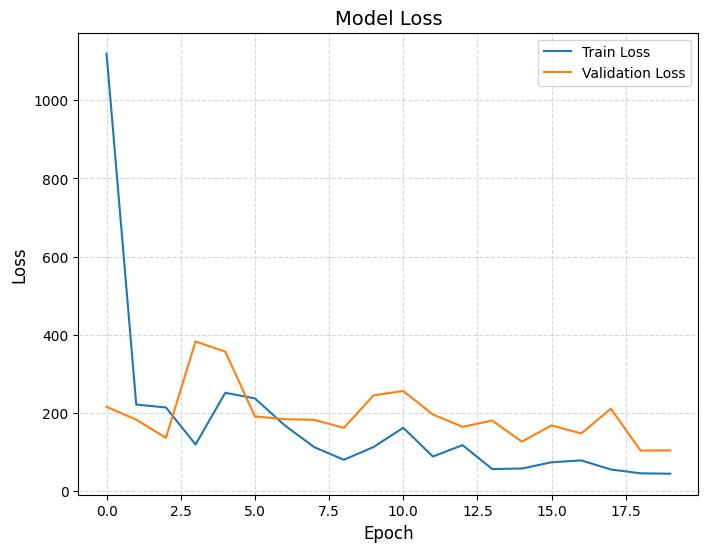

In [14]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history3.history['accuracy'], label='Train Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(loc='lower right', fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history3.history['loss'], label='Train Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.title('Model Loss', fontsize=14)
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()


Hypertuning with best architecture

In [15]:
# import random
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping
# import numpy as np

# # Define the DNN model function
# def build_dnn_model(input_shape, filter, filter2, filter3):
#     model = Sequential()
    
#     # Input layer
#     model.add(Dense(filter, activation='relu', input_shape=input_shape))
#     # model.add(Dropout(dropout_rate))
    
#     # Hidden layers
#     model.add(Dense(filter2, activation='relu'))
#     # model.add(Dropout(dropout_rate))

#     model.add(Dense(filter3, activation='relu'))
#     # model.add(Dropout(dropout_rate))
    
#     # Output layer for multiclass classification
#     model.add(Dense(3, activation='softmax'))
    
#     model.compile(optimizer=Adam(), 
#                   loss='sparse_categorical_crossentropy', 
#                   metrics=['accuracy'])
#     return model

# # Define hyperparameter ranges
# filter_range = [64, 128]
# filter_range2  = [64, 128]
# filter_range3  = [64, 128]
# epochs_range = [10, 20, 30]

# # Number of random trials
# n_trials = 10

# # Flatten the input data for DNN
# X_train_flattened = X_train.reshape(X_train.shape[0], -1)
# X_valid_flattened = X_valid.reshape(X_valid.shape[0], -1)
# X_test_flattened = X_test.reshape(X_test.shape[0], -1)

# # Initialize variables to track the best configuration
# best_params = None
# best_val_accuracy = 0.0
# results = []

# # Random Search Loop
# for trial in range(n_trials):
#     # Randomly sample hyperparameters
#     filter = random.choice(filter_range)
#     filter2 = random.choice(filter_range2)
#     filter3 = random.choice(filter_range3)
#     epochs = random.choice(epochs_range)
    
#     print(f"Trial {trial + 1}/{n_trials}: filter={filter}, filter 2={filter2}, filter 3={filter3} "
#           f"epochs={epochs}")
    
#     # Build the model
#     model = build_dnn_model(input_shape=(X_train_flattened.shape[1],), 
#                             filter=filter, 
#                             filter2=filter2,
#                             filter3=filter3)
                             
#     # Early stopping
#     early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    
#     # Train the model
#     history = model.fit(
#         X_train_flattened, y_train,
#         validation_data=(X_valid_flattened, y_valid),
#         epochs=epochs,
#         callbacks=[early_stopping],
#         verbose=0
#     )
    
#     # Evaluate the model on the validation set
#     val_accuracy = np.max(history.history['val_accuracy'])
#     results.append((filter, filter2, filter3, epochs, val_accuracy))
    
#     # Update the best parameters if the current configuration is better
#     if val_accuracy > best_val_accuracy:
#         best_val_accuracy = val_accuracy
#         best_params = (filter, filter2, filter3, epochs)

# # Output all configurations and the best one
# for result in results:
#     print(f"Configuration: filter={result[0]}, filter 2={result[1]}, filter 3={result[2]}, "
#           f"epochs={result[3]}, val_accuracy={result[4]:.4f}")

# print(f"Best hyperparameters: filter={best_params[0]}, filter 2={result[1]}, filter 3={result[2]}, "
#       f"epochs={best_params[3]}")
# print(f"Best validation accuracy: {best_val_accuracy:.4f}")


In [20]:
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

# Define the DNN model function
def build_dnn_model(input_shape, filter, filter2):
    model = Sequential()
    
    # Input layer
    model.add(Dense(filter, activation='relu', input_shape=input_shape))
    # model.add(Dropout(dropout_rate))
    
    # Hidden layers
    model.add(Dense(filter2, activation='relu'))
    # model.add(Dropout(dropout_rate))
    
    # Output layer for multiclass classification
    model.add(Dense(3, activation='softmax'))
    
    model.compile(optimizer=Adam(), 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

# Define hyperparameter ranges
filter_range = [64, 128]
filter_range2  = [64, 128]
epochs_range = [10, 20, 30]

# Number of random trials
n_trials = 10

# Flatten the input data for DNN
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_valid_flattened = X_valid.reshape(X_valid.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

# Initialize variables to track the best configuration
best_params = None
best_val_accuracy = 0.0
results = []

# Random Search Loop
for trial in range(n_trials):
    # Randomly sample hyperparameters
    filter = random.choice(filter_range)
    filter2 = random.choice(filter_range2)
    epochs = random.choice(epochs_range)
    
    print(f"Trial {trial + 1}/{n_trials}: filter={filter}, filter 2={filter2}"
          f"epochs={epochs}")
    
    # Build the model
    model = build_dnn_model(input_shape=(X_train_flattened.shape[1],), 
                            filter=filter, 
                            filter2=filter2)
                             
    # Early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    
    # Train the model
    history = model.fit(
        X_train_flattened, y_train,
        validation_data=(X_valid_flattened, y_valid),
        epochs=epochs,
        callbacks=[early_stopping],
        verbose=0
    )
    
    # Evaluate the model on the validation set
    val_accuracy = np.max(history.history['val_accuracy'])
    results.append((filter, filter2, epochs, val_accuracy))
    
    # Update the best parameters if the current configuration is better
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_params = (filter, filter2, epochs)

# Output all configurations and the best one
for result in results:
    print(f"Configuration: filter={result[0]}, filter 2={result[1]}, "
          f"epochs={result[2]}, val_accuracy={result[3]:.4f}")

print(f"Best hyperparameters: filter={best_params[0]}, filter 2={result[1]}, "
      f"epochs={best_params[2]}")
print(f"Best validation accuracy: {best_val_accuracy:.4f}")


Trial 1/10: filter=64, filter 2=64epochs=10


c:\Users\Joe Chok\anaconda3\envs\dlmodels\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Trial 2/10: filter=64, filter 2=64epochs=10
Trial 3/10: filter=128, filter 2=64epochs=10
Trial 4/10: filter=64, filter 2=64epochs=10
Trial 5/10: filter=128, filter 2=64epochs=30
Trial 6/10: filter=128, filter 2=128epochs=30
Trial 7/10: filter=64, filter 2=64epochs=20
Trial 8/10: filter=64, filter 2=64epochs=20
Trial 9/10: filter=64, filter 2=128epochs=30
Trial 10/10: filter=64, filter 2=64epochs=10
Configuration: filter=64, filter 2=64, epochs=10, val_accuracy=0.6270
Configuration: filter=64, filter 2=64, epochs=10, val_accuracy=0.5476
Configuration: filter=128, filter 2=64, epochs=10, val_accuracy=0.5952
Configuration: filter=64, filter 2=64, epochs=10, val_accuracy=0.5556
Configuration: filter=128, filter 2=64, epochs=30, val_accuracy=0.5397
Configuration: filter=128, filter 2=128, epochs=30, val_accuracy=0.6349
Configuration: filter=64, filter 2=64, epochs=20, val_accuracy=0.6270
Configuration: filter=64, filter 2=64, epochs=20, val_accuracy=0.5873
Configuration: filter=64, filter 2

Retrain using best params

In [21]:
# Rebuild the best model
best_model = build_dnn_model(
    input_shape=(X_train_flattened.shape[1],),
    filter=best_params[0],
    filter2=best_params[1]
)

# Train the best model on the training set
best_model.fit(
    X_train_flattened, y_train,
    validation_data=(X_valid_flattened, y_valid),
    epochs=best_params[2],
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
    verbose=0
)

# Evaluate the best model on the test set
test_loss, test_accuracy = best_model.evaluate(X_test_flattened, y_test, verbose=0)

# Print the test results
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")


Test Accuracy: 0.6825
Test Loss: 32.9423


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.70      0.57      0.63        49
     Class 1       0.79      0.66      0.72        41
     Class 2       0.60      0.86      0.70        36

    accuracy                           0.68       126
   macro avg       0.70      0.70      0.68       126
weighted avg       0.70      0.68      0.68       126



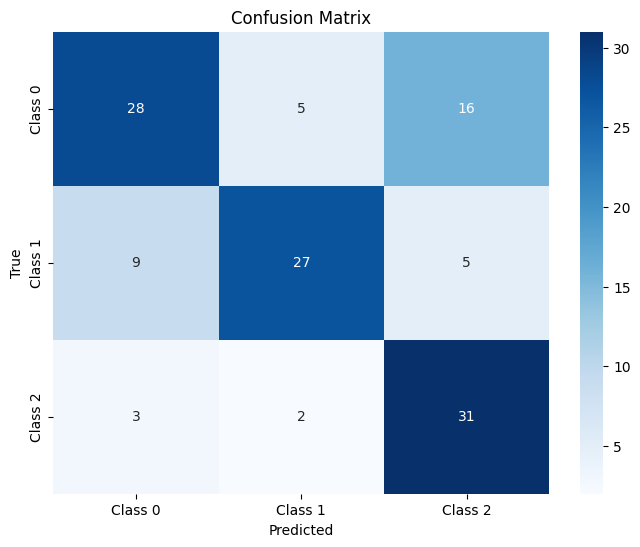

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = np.argmax(best_model.predict(X_test_flattened), axis=1)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1', 'Class 2']))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


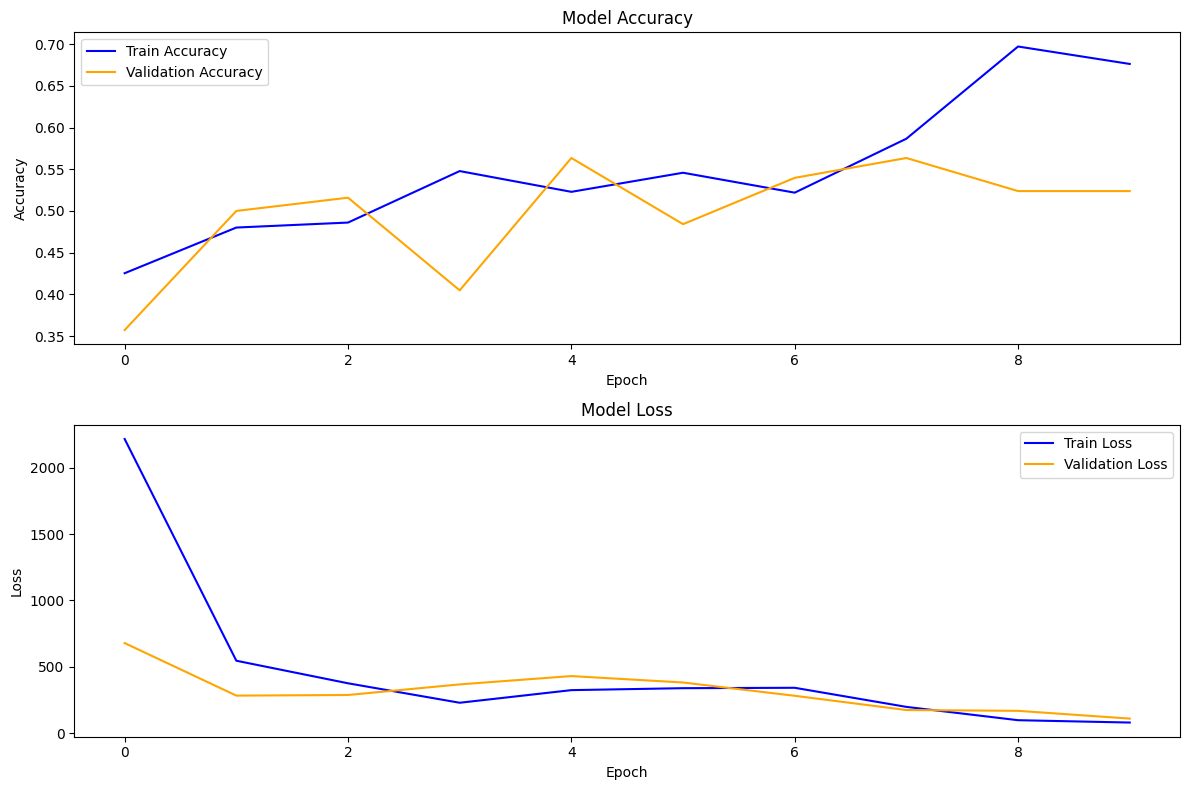

In [24]:
# Extract training and validation metrics from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot metrics
plt.figure(figsize=(12, 8))

# Plot accuracy
plt.subplot(2, 1, 1)
plt.plot(train_accuracy, label="Train Accuracy", color='blue')
plt.plot(val_accuracy, label="Validation Accuracy", color='orange')
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(loc="best")

# Plot loss
plt.subplot(2, 1, 2)
plt.plot(train_loss, label="Train Loss", color='blue')
plt.plot(val_loss, label="Validation Loss", color='orange')
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(loc="best")

plt.tight_layout()
plt.show()


In [ ]:
# Save the best model
best_model.save("best_dnn_model.h5")
print("Model saved successfully.")

Model saved successfully.


Test with unseen image

In [ ]:
# from tensorflow.keras.models import load_model
# from tensorflow.keras.preprocessing.image import load_img, img_to_array
# import numpy as np

# # Load the saved model
# model = load_model("best_dnn_model.h5")
# print("Model loaded successfully.")

# # Function to preprocess the image
# def preprocess_image(image_path, target_size=(224, 224)):
#     """
#     Preprocess the image for prediction.
#     - Resizes the image to target_size.
#     - Normalizes pixel values to [0, 1].
#     - Flattens the image for compatibility with the model.
#     """
#     # Load the image from the given path
#     img = load_img(image_path, target_size=target_size)  # Resize to 224x224
#     img_array = img_to_array(img)  # Convert image to a numpy array
#     # img_array = img_array / 255.0  # Normalize pixel values to [0, 1]
#     img_array = img_array.reshape((1, -1))  # Flatten the image
#     return img_array

# # Provide the path to your unseen image
# image_path = "benign (9).png"

# # Preprocess the image
# image = preprocess_image(image_path)

# # Predict using the loaded model
# predictions = model.predict(image)
# predicted_class = np.argmax(predictions, axis=-1)  # Get the class index with the highest probability

# # Output the results
# print(f"Predicted class index: {predicted_class[0]}")
# print(f"Prediction probabilities: {predictions}")


Model loaded successfully.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted class index: 0
Prediction probabilities: [[1. 0. 0.]]
